# Predicting Life Expectancy from WHO Data

In [1]:
import numpy as np
np.set_printoptions(legacy='1.25')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
life_exp = pd.read_csv('Life Expectancy Data.csv')
life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# correlations between life expectancy and other factors
life_exp.corr(numeric_only=True)['Life expectancy ']

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
 BMI                               0.567694
under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
 HIV/AIDS                         -0.556556
GDP                                0.461455
Population                        -0.021538
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64

<Axes: ylabel='Frequency'>

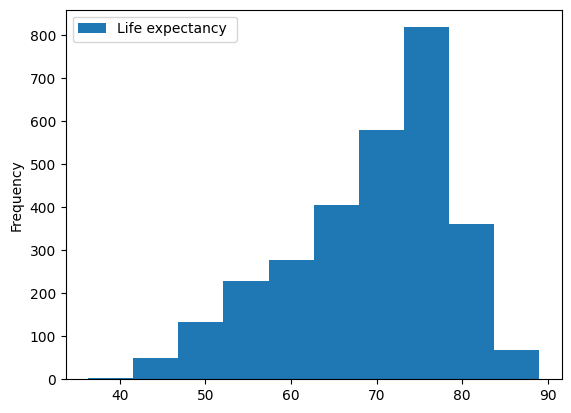

In [5]:
life_exp.plot.hist(y = 'Life expectancy ')

## Initial impressions

Interestingly, life expectancy is most highly correlated with years of schooling and income composition of resources.

Provided defintions:
<br>**Income composition of resources** - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
<br>**Schooling** - Number of years of schooling (years)

## Data cleaning

In [6]:
life_exp[life_exp.isnull().any(axis=1)] # axis = 0 for rows, 1 for columns

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


#### The 'Hepatitis B' column has a lot of null values, so let's just remove it:

In [7]:
life_exp = life_exp.drop('Hepatitis B', axis=1)
life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#### Since we'll be focusing on 'Income composition of resources' and 'Schooling', let's remove any rows with null values in those columns:

In [8]:
life_exp.dropna(subset=['Income composition of resources', 'Schooling', 'Life expectancy '], inplace=True)
life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
life_exp = life_exp[['Country', 'Year', 'Income composition of resources', 'Schooling', 'Life expectancy ']]

## Linear regression plots

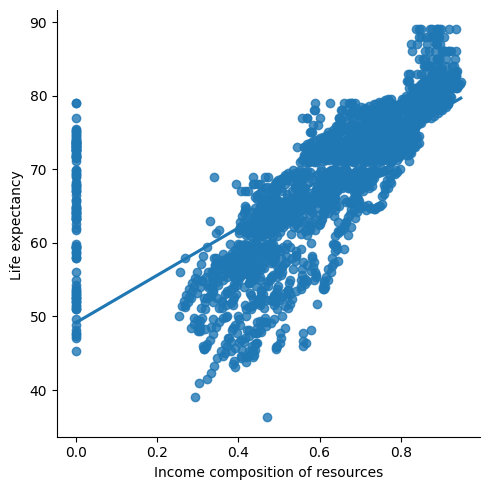

In [10]:
sns.lmplot(x = 'Income composition of resources', y = 'Life expectancy ', data = life_exp, fit_reg = True, ci = None)

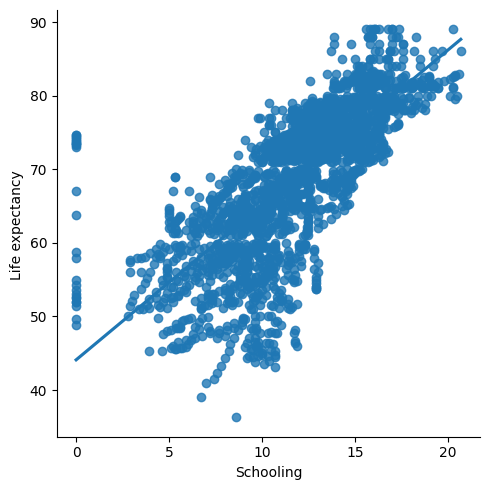

In [11]:
sns.lmplot(x = 'Schooling', y = 'Life expectancy ', data = life_exp, fit_reg = True, ci = None)

#### **Follow-up question:** there are a number of outlier data points that are zero but not NaN that are skewing the results (this is easy to see in the linear regression plots above.) Are these data points all from the same countries?

In [12]:
life_exp[life_exp['Schooling'] < 1]

,Country,Year,Income composition of resources,Schooling,Life expectancy
74,Antigua and Barbuda,2005,0.0,0.0,74.6
75,Antigua and Barbuda,2004,0.0,0.0,74.4
76,Antigua and Barbuda,2003,0.0,0.0,74.2
77,Antigua and Barbuda,2002,0.0,0.0,74.0
78,Antigua and Barbuda,2001,0.0,0.0,73.8
79,Antigua and Barbuda,2000,0.0,0.0,73.6
335,Bosnia and Herzegovina,2000,0.0,0.0,74.6
849,Equatorial Guinea,2000,0.0,0.0,52.7
1714,Micronesia (Federated States of),2000,0.0,0.0,67.0
1744,Montenegro,2003,0.0,0.0,73.5


<Axes: ylabel='Frequency'>

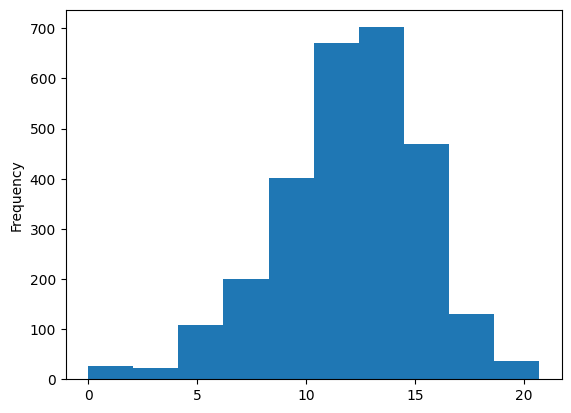

In [13]:
life_exp['Schooling'].plot.hist()

#### *This will require further investigation - are these true zero's, or missing data from the WHO database?*

## Split into train & test data sets

#### We want to predict life expectancy and test it against the most recent data available, 2015.

In [14]:
train = life_exp[life_exp['Year'] < 2015].copy()
test = life_exp[life_exp['Year'] >= 2015].copy()

In [15]:
test.shape[0] / train.shape[0]

0.06666666666666667

#### Note that this is a pretty small test set, since there are ~16 years of data and we are only looking to predict and test our model on the most recent year available.

## Train the model

In [16]:
from sklearn.linear_model import LinearRegression

# initialize linear regression class
reg = LinearRegression()
predictors = ['Income composition of resources', 'Schooling']
target = 'Life expectancy '
reg.fit(train[predictors], train['Life expectancy '])

LinearRegression()

In [17]:
predictions = reg.predict(test[predictors])
test['Life expectancy prediction'] = predictions # adds a new column to the test dataframe
test

,Country,Year,Income composition of resources,Schooling,Life expectancy,Life expectancy prediction
0,Afghanistan,2015,0.479,10.1,65.0,64.588539
16,Albania,2015,0.762,14.2,77.8,74.293755
32,Algeria,2015,0.743,14.4,75.6,74.286476
48,Angola,2015,0.531,11.4,52.4,67.112904
64,Antigua and Barbuda,2015,0.784,13.9,76.4,74.209425
...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,0.769,14.3,74.1,74.531897
2874,Viet Nam,2015,0.678,12.6,76.0,70.893775
2890,Yemen,2015,0.499,9.0,65.7,63.390355
2906,Zambia,2015,0.576,12.5,61.8,69.263559


In [18]:
from sklearn.metrics import mean_absolute_error

life_exp.describe()#['Life expectancy ']

,Year,Income composition of resources,Schooling,Life expectancy
count,2768.000000,2768.000000,2768.000000,2768.000000
mean,2007.500000,0.627419,11.999639,69.349566
std,4.610605,0.210978,3.346440,9.360784
min,2000.000000,0.000000,0.000000,36.300000
25%,2003.750000,0.493000,10.100000,63.500000
50%,2007.500000,0.677000,12.300000,72.200000
75%,2011.250000,0.779250,14.300000,75.500000
max,2015.000000,0.948000,20.700000,89.000000


In [19]:
err = mean_absolute_error(test['Life expectancy '], test['Life expectancy prediction'])
err

3.069769057729164

#### The average absolute error of our prediction for the 2015 life expectancy is within one standard deviation of the actual value, which isn't bad.

#### Looking country by country:

In [20]:
errs = (test['Life expectancy '] - test['Life expectancy prediction']).abs()
errs_by_country = errs.groupby(test['Country']).mean()
errs_by_country

Country
Afghanistan                            0.411461
Albania                                3.506245
Algeria                                1.313524
Angola                                14.712904
Antigua and Barbuda                    2.190575
                                        ...    
Venezuela (Bolivarian Republic of)     0.431897
Viet Nam                               5.106225
Yemen                                  2.309645
Zambia                                 7.463559
Zimbabwe                               1.730029
Length: 173, dtype: float64

In [21]:
errs_by_country.sort_values(ascending=False)

Country
Angola          14.712904
Sierra Leone    12.071765
Lesotho         11.936403
Nigeria         10.627027
Cyprus           9.222564
                  ...    
Kyrgyzstan       0.101594
Suriname         0.088747
Netherlands      0.040118
Norway           0.035820
Montenegro       0.029313
Length: 173, dtype: float64

#### Let's look at the error ratio for each country:

In [22]:
life_exp_by_country = test['Life expectancy '].groupby(test['Country']).mean()
err_ratio = errs_by_country / life_exp_by_country
err_ratio

Country
Afghanistan                           0.006330
Albania                               0.045067
Algeria                               0.017375
Angola                                0.280781
Antigua and Barbuda                   0.028672
                                        ...   
Venezuela (Bolivarian Republic of)    0.005829
Viet Nam                              0.067187
Yemen                                 0.035154
Zambia                                0.120770
Zimbabwe                              0.025821
Length: 173, dtype: float64

<Axes: ylabel='Frequency'>

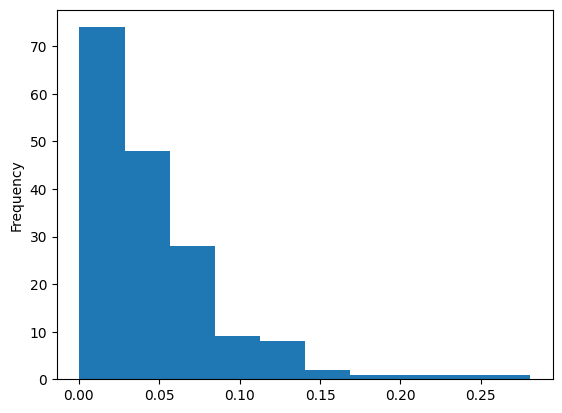

In [23]:
err_ratio.plot.hist()

In [24]:
err_ratio.sort_values()

Country
Montenegro      0.000385
Norway          0.000438
Netherlands     0.000490
Suriname        0.001239
Kyrgyzstan      0.001429
                  ...   
Cameroon        0.143248
Nigeria         0.194991
Lesotho         0.222279
Sierra Leone    0.236701
Angola          0.280781
Length: 173, dtype: float64

In [25]:
test['Abs. error'] = errs
test['Error ratio'] = errs / test['Life expectancy ']
test

,Country,Year,Income composition of resources,Schooling,Life expectancy,Life expectancy prediction,Abs. error,Error ratio
0,Afghanistan,2015,0.479,10.1,65.0,64.588539,0.411461,0.006330
16,Albania,2015,0.762,14.2,77.8,74.293755,3.506245,0.045067
32,Algeria,2015,0.743,14.4,75.6,74.286476,1.313524,0.017375
48,Angola,2015,0.531,11.4,52.4,67.112904,14.712904,0.280781
64,Antigua and Barbuda,2015,0.784,13.9,76.4,74.209425,2.190575,0.028672
...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,0.769,14.3,74.1,74.531897,0.431897,0.005829
2874,Viet Nam,2015,0.678,12.6,76.0,70.893775,5.106225,0.067187
2890,Yemen,2015,0.499,9.0,65.7,63.390355,2.309645,0.035154
2906,Zambia,2015,0.576,12.5,61.8,69.263559,7.463559,0.120770


In [26]:
test.sort_values('Life expectancy ', ascending=False)

,Country,Year,Income composition of resources,Schooling,Life expectancy,Life expectancy prediction,Abs. error,Error ratio
2345,Slovenia,2015,0.888,17.3,88.0,80.342702,7.657298,0.087015
737,Denmark,2015,0.923,19.2,86.0,83.431369,2.568631,0.029868
544,Chile,2015,0.845,16.3,85.0,78.356922,6.643078,0.078154
673,Cyprus,2015,0.854,14.3,85.0,75.777436,9.222564,0.108501
1314,Japan,2015,0.902,15.3,83.7,77.836483,5.863517,0.070054
...,...,...,...,...,...,...,...,...
1474,Lesotho,2015,0.495,10.7,53.7,65.636403,11.936403,0.222279
528,Chad,2015,0.394,7.3,53.1,59.547086,6.447086,0.121414
512,Central African Republic,2015,0.347,7.1,52.5,58.587239,6.087239,0.115947
48,Angola,2015,0.531,11.4,52.4,67.112904,14.712904,0.280781
